# Modelo computacional de la curva
Código empleado para el primer entregable

In [180]:
import numpy as np 
import matplotlib.pyplot as plt 
from sympy import *
from funciones.curvaturas import get_radius, get_length
from funciones.mates import find_minmax

### Definición de los puntos críticos dentro de la curva a modelar


In [181]:
# Inicial
x_0 = 300
y_0 = 1100

# Inflexión
x1 = 800
y1 = 1400

# Crítico
x2 = 1400
y2 = 3500

# Final
x_f = 1800
y_f = 1200

r_crit = 50

### Obtener una función de tercer grado que ajuste a los puntos anteriores
Dentro del módulo de Numpy, utilizamos la función de polyfit para obtener la función que mejor ajusta.

In [182]:
x = np.array([x_0,x1,x2,x_f])
y = np.array([y_0,y1,y2,y_f])
z = np.polyfit(x,y,3)
f = np.poly1d(z)
print(f)
print(z)

a = z[0]
b = z[1]
c = z[2]
d = z[3]

xi = Symbol('xi')
fa = a*xi**3+b*xi**2+c*xi+d

            3           2
-7.924e-06 x + 0.02245 x - 16.41 x + 4215
[-7.92424242e-06  2.24469697e-02 -1.64051515e+01  4.21527273e+03]


Podemos observar que la función de tercer grado que mejor ajusta a los puntos es $-0.000007924x^3+0.02245x^2-16.41x+4215$

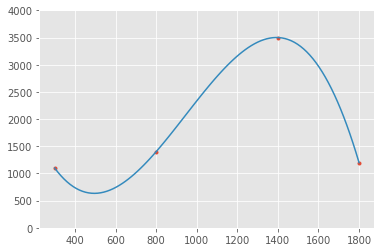

In [183]:
xp= np.linspace(x_0,x_f,100)
plt.ylim(0,y2+500)
plt.plot(x, y, '.',xp,f(xp),'-')
plt.style.use("ggplot")

### Longitud de la curva
Para calcular la longitud de la curva, se emplea la equación de la longitud del arco en forma integral $\int_{a}^{b} \sqrt{1+(f'(x))^2}\ dx$. La función para obtener la longitud `get_length` está definida en el módulo curvaturas en funciones, y aplica la ecuación previamente citada.


In [184]:
length = get_length(xi, fa, x_0, x_f)
print(length, "metros")

5953.779671569121 metros


### Mínimo y máximo local
Utilizando la función de `find_minmax` definida en el módulo de mates en funciones, podemos encontrar el punto mínimo y máximo entre el punto inicial y final definido al princípio.

In [185]:
x_minmax = np.linspace(x_0, x_f, 10000)
y_minmax = f(x_minmax)
print(find_minmax(x_minmax, y_minmax))

([495.31953195319534, 633.6795879506585], [1393.1593159315933, 3500.509185342904])


### Zonas críticas
Las zonas críticas se definen dependiendo del radio de la curvatura que se forma en cualquier punto de la función. De acuerdo al caso presentado, si este radio es menor a los 100 metros se podría considerar crítico, es decir, una curva peligrosa.
El radio de cierto punto se puede determinar como $r = \frac {1}{k}$ en donde $k$ es la curvatura y se puede obtener mediante la siguiente ecuación:
$k = \frac{|y''(x)|}{[1+(y'(x))^2]^\frac{3}{2}}$

Aplicando estas ecuaciones, se generó la función `get_radius` que calcula el radio de los puntos dada una función. Se definen dos intervalos en $x$, siendo una cada 20 metros y otra casa metro

In [186]:
x_1 = np.arange(x_0, x_f, 1)
x_20 = np.arange(x_0, x_f, 20)
y_1 = f(x_1)
y_20 = f(x_20)


r1 = get_radius(xi, fa, x_1)
r20 = get_radius(xi, fa, x_20)

crit_index1 = np.where(r1 <= r_crit)
crit_index20 = np.where(r20 <= r_crit)

xcurve1 = np.array([x_1[i] for i in crit_index1])
xcurve20 = np.array([x_20[i] for i in crit_index20])

ycurve1 = np.array([y_1[i] for i in crit_index1])
ycurve20 = np.array([y_20[i] for i in crit_index20])
print(xcurve1)
print(xcurve20)

[[ 484  485  486  487  488  489  490  491  492  493  494  495  496  497
   498  499  500  501  502  503 1385 1386 1387 1388 1389 1390 1391 1392
  1393 1394 1395 1396 1397 1398 1399 1400 1401 1402 1403 1404]]
[[ 500 1400]]


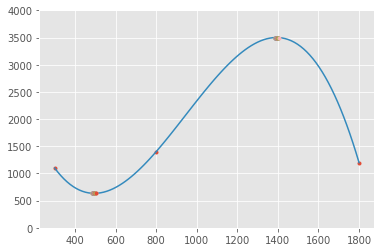

In [187]:
xp= np.linspace(x_0,x_f,100)
plt.ylim(0,y2+500)
plt.plot(x, y, '.',xp,f(xp),'-')
plt.plot(xcurve1, ycurve1,'.')
plt.style.use("ggplot")